<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/%D0%9C%D0%9C%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import plotly.express as px
import numpy as np
import pandas as pd

# Создаем случайные данные
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

# Создаем DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Создаем scatter plot с lowess сглаживанием
fig = px.scatter(df, x='x', y='y', trendline='lowess')

# Показываем график
fig.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.29e-31
Time:                        14:46:37   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2222      0.193     21.843      0.0

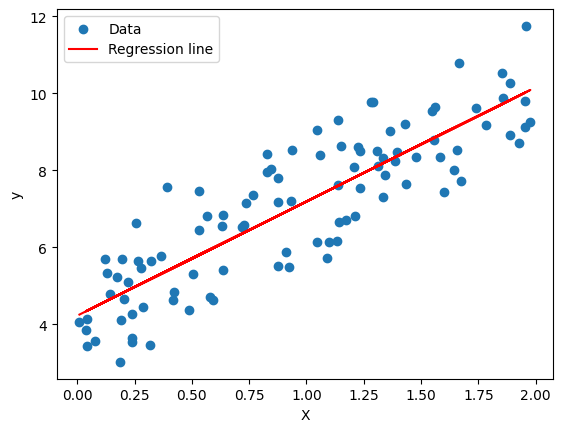

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Создаем случайные данные
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Добавляем константу для оценки параметров
X_b = sm.add_constant(X)

# Оцениваем параметры с помощью метода максимального правдоподобия
model = sm.OLS(y, X_b)
results = model.fit()

# Выводим результаты
print(results.summary())

# Предсказываем значения
y_pred = results.predict(X_b)

# Строим график
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [2]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 39.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


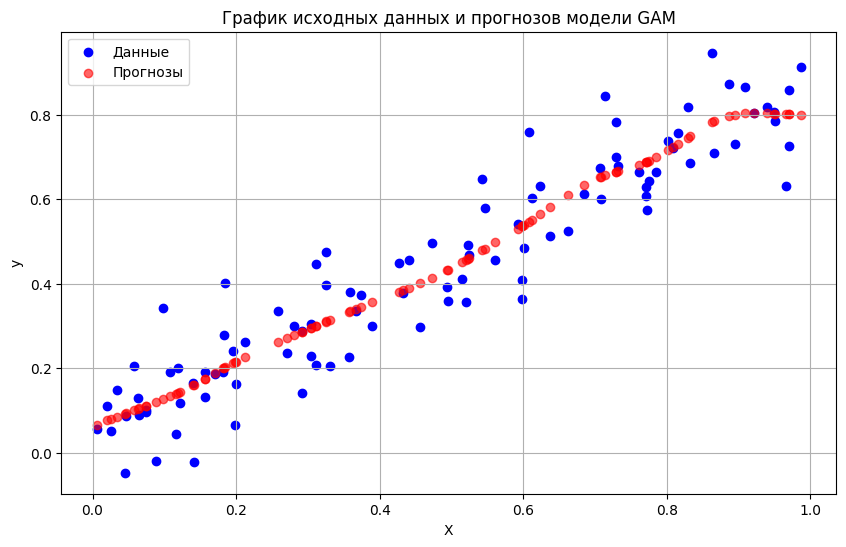

In [5]:
from pygam import LinearGAM, s
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)
X = np.random.rand(100, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, 100)

# Создание и обучение модели
gam = LinearGAM(s(0)).fit(X, y)

# Прогнозирование
predictions = gam.predict(X)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Данные')
plt.scatter(X, predictions, color='red', label='Прогнозы', alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('График исходных данных и прогнозов модели GAM')
plt.legend()
plt.grid(True)
plt.show()


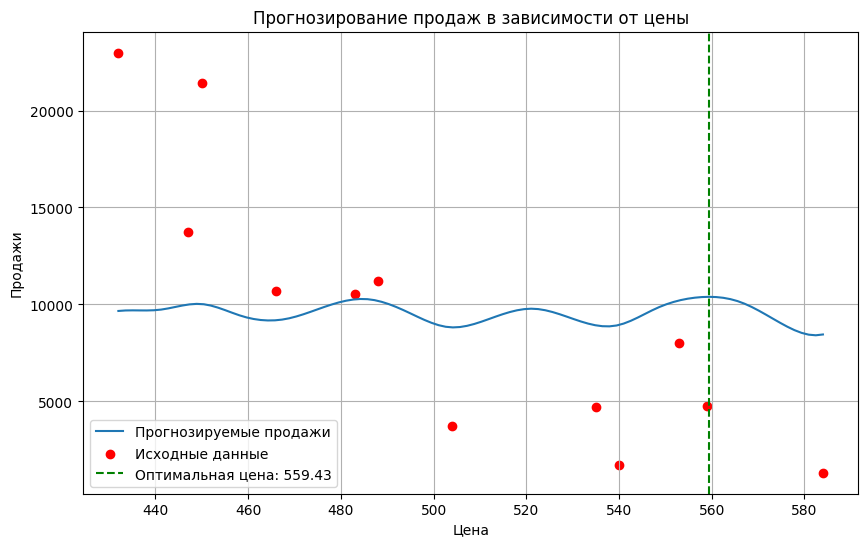

(559.4343434343434, 10393.723805263187)

In [6]:
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Данные
prices = np.array([584, 540, 504, 488, 447, 559, 483, 535, 466, 450, 432, 553])
sales = np.array([1324, 1706, 3735, 11195, 13751, 4755, 10556, 4733, 10701, 21422, 22981, 7994])

# Обучение модели
gam = LinearGAM(s(0)).fit(prices, sales)

# Прогнозирование на следующем месяце для различных цен
price_range = np.linspace(min(prices), max(prices), 100)
sales_pred = gam.predict(price_range)

# Поиск цены, при которой продажи максимальны
optimal_price = price_range[np.argmax(sales_pred)]
optimal_sales = max(sales_pred)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(price_range, sales_pred, label='Прогнозируемые продажи')
plt.scatter(prices, sales, color='red', label='Исходные данные')
plt.axvline(optimal_price, color='green', linestyle='--', label=f'Оптимальная цена: {optimal_price:.2f}')
plt.xlabel('Цена')
plt.ylabel('Продажи')
plt.title('Прогнозирование продаж в зависимости от цены')
plt.legend()
plt.grid(True)
plt.show()

# Вывод оптимальной цены и объема продаж
optimal_price, optimal_sales


In [8]:
prices.mean()

503.4166666666667

In [9]:
sales.mean()

9571.083333333334

In [10]:
sales_pred

array([ 9665.11238057,  9690.5941441 ,  9696.20146205,  9692.71860438,
        9690.92984104,  9701.61944195,  9735.54788044,  9796.51996293,
        9871.75777002,  9946.0649396 , 10004.24510953, 10031.10191769,
       10011.65628514,  9942.29927917,  9836.14874691,  9707.6614424 ,
        9571.29411964,  9441.50353266,  9332.40312556,  9251.20246922,
        9198.71728143,  9175.52216244,  9182.19171251,  9219.30053189,
        9286.98166219,  9380.90221903,  9494.1361832 ,  9619.72559402,
        9750.71249084,  9880.138913  , 10001.17798506, 10107.75120211,
       10194.04522038, 10254.24700683, 10282.54352842, 10273.12216158,
       10222.55670536, 10135.42743126, 10017.99182198,  9876.50736024,
        9717.23152876,  9546.43188862,  9371.7940593 ,  9203.8715869 ,
        9053.56398913,  8931.77078371,  8849.39148834,  8817.08188685,
        8836.64944141,  8898.75736201,  8993.35826419,  9110.40476353,
        9239.84947557,  9371.72413178,  9497.30123808,  9608.83845146,
      